# Bitcoin SPY Investments
Bitcoin vs SPY Investments, An up and coming investment fund management took on a small client recently, who wanted to invest a small amount of capital with them. As a beginner to the financial markets he wanted to see if Bitcoin or the SPDR S&P500 (known as: SPY) would be more of a sound investment for the future.

Bitcoin vs Spy Investments will not present to the client, historical data on both markets, and show which investment is more volatile and lastly what the future may hold for each investment, which the client would then choose to invest in long term.




In [88]:
#import required libraries and dependencies.

import pandas as pd
from pathlib import Path
import os
from dotenv import load_dotenv
import requests
import json
import seaborn as sns
import numpy as np
import alpaca_trade_api as tradeapi
import datetime as dt
import pytz
import hvplot.pandas
%matplotlib inline
import matplotlib.pyplot as plt

In [89]:
# Load .env enviroment variables into the notebook.
load_dotenv()

Python-dotenv could not parse statement starting at line 1


True

In [99]:
#Read btc csv file

btc_df = pd.read_csv(
    Path("./Resources/btcusd.csv")
)


display(btc_df.head())
display(btc_df.tail())

,Date,High,Low,Mid,Last,Bid,Ask,Volume
0,2022-08-24,21930.000000,21157.0,21523.5,21523.0,21523.0,21524.0,5217.512996
1,2022-08-23,21685.000000,20908.0,21539.5,21542.0,21539.0,21540.0,4932.494264
2,2022-08-22,21641.937086,20908.0,21200.5,21202.0,21200.0,21201.0,3442.989714
3,2022-08-21,21800.000000,21070.0,21636.0,21645.0,21634.0,21638.0,2284.597762
4,2022-08-20,21370.000000,20769.0,21130.5,21128.0,21130.0,21131.0,2161.722386


,Date,High,Low,Mid,Last,Bid,Ask,Volume
3001,2014-04-19,513.9899,473.83,505.01065,507.4999,502.5313,507.49,8963.618369
3002,2014-04-18,509.0000,474.25,483.77000,482.7500,482.7500,484.79,10458.045243
3003,2014-04-17,538.5000,486.10,507.02000,508.0000,506.0400,508.00,20709.783819
3004,2014-04-16,547.0000,495.00,537.50000,538.0000,537.0000,538.00,29633.358705
3005,2014-04-15,513.9000,452.00,504.23500,505.0000,503.5000,504.97,21013.584774


### Make an API Request for BITCOIN
Making an API request and then displaying the response data requires just the following two lines of code

In [112]:
# Make the API request
response = requests.get("https://api.coingecko.com/api/v3/coins/bitcoin/history?date=01-12-2018").json()

# Set the BITCOIN endpoint
btc_url = "https://api.alternative.me/v2/ticker/bitcoin/"

# Fetch the current Bitcoin price
response_btc = requests.get(btc_url).json()

# Display response data
print(json.dumps(response_btc, indent=4, sort_keys=True))

{
    "data": {
        "1": {
            "circulating_supply": 19133537,
            "id": 1,
            "last_updated": 1661599169,
            "max_supply": 21000000,
            "name": "Bitcoin",
            "quotes": {
                "USD": {
                    "market_cap": 386971392601,
                    "percent_change_1h": 0.105859858484292,
                    "percent_change_24h": -5.24182106309425,
                    "percent_change_7d": -3.46967265403045,
                    "percentage_change_1h": 0.105859858484292,
                    "percentage_change_24h": -5.24182106309425,
                    "percentage_change_7d": -3.46967265403045,
                    "price": 20219.0,
                    "volume_24h": 36445655413
                }
            },
            "rank": 1,
            "symbol": "BTC",
            "total_supply": 19133537,
            "website_slug": "bitcoin"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurrenc

In [113]:
btc_price = response_btc['data']['1']['symbol']
print(f"The symbol for Bitcoin is {btc_price}")

btc_price = response_btc['data']['1']['quotes']['USD']['price']
print(f"The price for Bitcoin is ${btc_price}")



The symbol for Bitcoin is BTC
The price for Bitcoin is $20219.0


In [140]:
#GET BTC CLOSING DATA


btc_df.loc[:,"Last"] = btc_df.loc[:,"Last"].astype("float")
btc_df.dtypes
# print(btc_df)

print(btc_df)

            Date          High       Low          Mid        Last         Bid  \
0     2022-08-24  21930.000000  21157.00  21523.50000  21523.0000  21523.0000   
1     2022-08-23  21685.000000  20908.00  21539.50000  21542.0000  21539.0000   
2     2022-08-22  21641.937086  20908.00  21200.50000  21202.0000  21200.0000   
3     2022-08-21  21800.000000  21070.00  21636.00000  21645.0000  21634.0000   
4     2022-08-20  21370.000000  20769.00  21130.50000  21128.0000  21130.0000   
...          ...           ...       ...          ...         ...         ...   
3001  2014-04-19    513.989900    473.83    505.01065    507.4999    502.5313   
3002  2014-04-18    509.000000    474.25    483.77000    482.7500    482.7500   
3003  2014-04-17    538.500000    486.10    507.02000    508.0000    506.0400   
3004  2014-04-16    547.000000    495.00    537.50000    538.0000    537.0000   
3005  2014-04-15    513.900000    452.00    504.23500    505.0000    503.5000   

           Ask        Volum

In [141]:

    
btc_closing = btc_df.loc[:,'Last']
btc_sliced.describe()

count     3006.000000
mean     12076.588720
std      16363.025678
min        178.000000
25%        593.632500
50%       6385.450000
75%      11522.000000
max      67524.000000
Name: Last, dtype: float64

# Drop all columns except close/low?

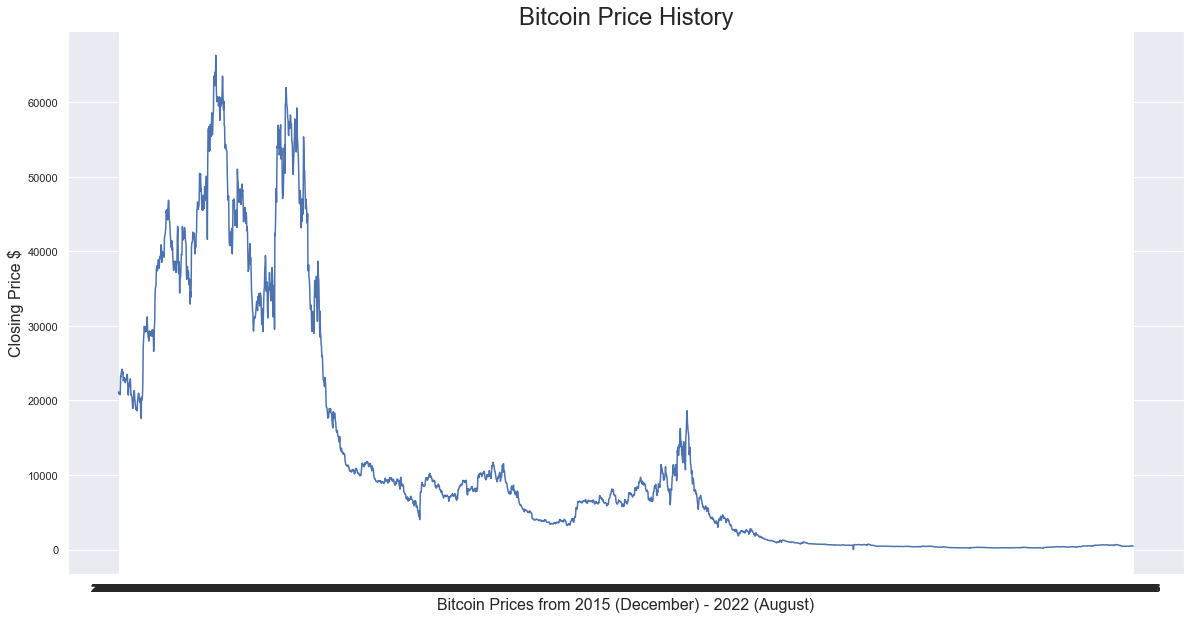

In [179]:
sns.set(rc={'figure.figsize':(20,10)})
plt.xlabel("Bitcoin Prices from 2015 (December) - 2022 (August)", size = 16)
plt.ylabel("Closing Price $", size = 16)
plt.title("Bitcoin Price History", size = 24)
spy_sns = sns.lineplot(x ="Date",y ="Low", data = btc_df, ci=False, markers=True)

# Alpaca Spy Data


In [145]:
# Set the variables for the Alpaca API and secret keys
alpaca_api_key = os.getenv("alpaca_api_key")
alpaca_secret_key = os.getenv("alpaca_secret_key")
alpaca_base_url = ('https://paper-api.alpaca.markets')
display(type(alpaca_api_key))
display(type(alpaca_secret_key))

#create alpaca api object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")


# check if this belongs
#btc = gold_spy_fd[gold_spy_fd['symbol']=='BTCUSD'].drop('symbol', axis=1)
#SPY = gold_spy_fd[gold_spy_fd['symbol']=='SPY'].drop('symbol', axis=1)


str

str

# Test api connection 

In [146]:

# instantiate REST API
api = tradeapi.REST(alpaca_api_key, alpaca_secret_key, alpaca_base_url, api_version='v2')

# obtain account information|
account = api.get_account()
print(account)

Account({   'account_blocked': False,
    'account_number': 'PA3GKRT4WDXZ',
    'accrued_fees': '0',
    'buying_power': '200000',
    'cash': '100000',
    'created_at': '2022-07-28T03:29:45.451334Z',
    'crypto_status': 'ACTIVE',
    'currency': 'USD',
    'daytrade_count': 0,
    'daytrading_buying_power': '0',
    'equity': '100000',
    'id': '961d7bb7-094b-4924-8e0d-76f84379f013',
    'initial_margin': '0',
    'last_equity': '100000',
    'last_maintenance_margin': '0',
    'long_market_value': '0',
    'maintenance_margin': '0',
    'multiplier': '2',
    'non_marginable_buying_power': '100000',
    'pattern_day_trader': False,
    'pending_transfer_in': '0',
    'portfolio_value': '100000',
    'regt_buying_power': '200000',
    'short_market_value': '0',
    'shorting_enabled': True,
    'sma': '100000',
    'status': 'ACTIVE',
    'trade_suspended_by_user': False,
    'trading_blocked': False,
    'transfers_blocked': False})



# Create basic dataframe for SPY and clean code


set proper tickers,timeframe,start/end_dates. Limit row to 1000
add Date above timestamp regarding data organizing to plot later.

In [147]:
#get 7 years worth of historical data for SPY
#set tickers 

tickers=['SPY']
timeframe='1D'

start_date = pd.Timestamp("2015-12-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2022-08-19", tz="America/New_York").isoformat()
print(start_date)
print(end_date)
#limit rows
limit_rows = 1000

#create SPY dataframe and add Date same column as timestamp.

spy_prices_df = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=limit_rows
).df




2015-12-01T00:00:00-05:00
2022-08-19T00:00:00-04:00


In [148]:
#Rename the low column to 

# spy_prices_df = pd.DataFrame(columns)
#create column for 'Date'
spy_prices_df.columns.name='Date'
spy_prices_df.reset_index
spy_prices_df


Date,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2015-12-01 05:00:00+00:00,209.42,210.8200,209.1100,210.68,97858418,337780,209.921410,SPY
2015-12-02 05:00:00+00:00,210.60,211.0000,208.2300,208.54,108069059,367013,209.563055,SPY
2015-12-03 05:00:00+00:00,208.90,209.1500,204.7511,205.58,166224154,546768,206.878936,SPY
2015-12-04 05:00:00+00:00,206.10,209.9700,205.9300,209.66,192878747,556731,208.178631,SPY
2015-12-07 05:00:00+00:00,209.20,209.7295,207.2000,208.27,102027111,374705,208.276128,SPY
...,...,...,...,...,...,...,...,...
2019-11-13 05:00:00+00:00,307.90,309.5400,307.6600,309.10,54813789,258612,308.889742,SPY
2019-11-14 05:00:00+00:00,308.77,309.6400,308.0900,309.55,52042374,197811,309.154768,SPY
2019-11-15 05:00:00+00:00,310.98,311.8400,310.2600,311.79,63017062,206158,311.224041,SPY


In [149]:
#drop symbol to clean data columns
SPY = spy_prices_df[spy_prices_df['symbol']=='SPY'].drop('symbol',axis=1)
#concat to create SPY
spy_prices_df = pd.concat([SPY],axis=1,keys=['SPY'])

#display data
display(spy_prices_df.head())
display(spy_prices_df.tail())


SPY                                         \
Date                         open      high       low   close     volume   
timestamp                                                                  
2015-12-01 05:00:00+00:00  209.42  210.8200  209.1100  210.68   97858418   
2015-12-02 05:00:00+00:00  210.60  211.0000  208.2300  208.54  108069059   
2015-12-03 05:00:00+00:00  208.90  209.1500  204.7511  205.58  166224154   
2015-12-04 05:00:00+00:00  206.10  209.9700  205.9300  209.66  192878747   
2015-12-07 05:00:00+00:00  209.20  209.7295  207.2000  208.27  102027111   

                                                   
Date                      trade_count        vwap  
timestamp                                          
2015-12-01 05:00:00+00:00      337780  209.921410  
2015-12-02 05:00:00+00:00      367013  209.563055  
2015-12-03 05:00:00+00:00      546768  206.878936  
2015-12-04 05:00:00+00:00      556731  208.178631  
2015-12-07 05:00:00+00:00      374705  208.276128

SPY                                    \
Date                         open    high     low   close    volume   
timestamp                                                             
2019-11-13 05:00:00+00:00  307.90  309.54  307.66  309.10  54813789   
2019-11-14 05:00:00+00:00  308.77  309.64  308.09  309.55  52042374   
2019-11-15 05:00:00+00:00  310.98  311.84  310.26  311.79  63017062   
2019-11-18 05:00:00+00:00  311.52  312.28  311.03  312.02  50249492   
2019-11-19 05:00:00+00:00  312.68  312.69  311.22  311.93  71272497   

                                                   
Date                      trade_count        vwap  
timestamp                                          
2019-11-13 05:00:00+00:00      258612  308.889742  
2019-11-14 05:00:00+00:00      197811  309.154768  
2019-11-15 05:00:00+00:00      206158  311.224041  
2019-11-18 05:00:00+00:00      203344  311.812773  
2019-11-19 05:00:00+00:00      230880  312.009439

<AxesSubplot:title={'center':'SPY Chart 2015-2022'}, xlabel='timestamp'>

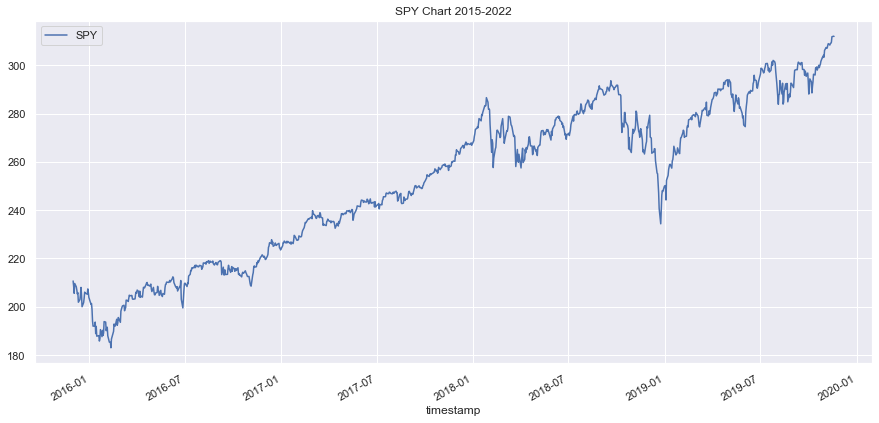

In [171]:
#plot the spy chart 
spy_closing_df.plot(
    figsize=(15,7),
    title='SPY Chart 2015-2022')

In [173]:
#access the 'close' column from spy_prices_df
spy_closing_df['SPY'] = spy_prices_df['SPY']['close']

# Plot the close price for SPY historical data 2015-2022
Use seaborn to plot the data for Spy from the end of 2018 till present day (August 2022)

In [180]:
#find a way to combine the two data if possible.

# sns.set(rc={"figure.figsize":(20,10)})
# plt.xlabel("SPY Stock Prices (December) - 2022 (August)", size = 16)
# plt.ylabel("Closing Price", size = 16)
# plt.title("SPY Stock Prices 2015-2022", size = 24)
# spy_seaplot = sns.lineplot(x="timestamp",y="close", data= spy_prices_df, ci=False, markers=True
# )


# Make sure that both btc and spy have their 'date' and 'close' information sliced with .loc function

In [178]:

# Create an empty `closing_prices_df` DataFrame using Pandas
#closing_prices_df = pd.DataFrame(
#)

# Populate the `closing_prices_df` DataFrame by accessing the `close` column
# from the `prices_df` DataFrame for both SPY and BTC .
#closing_prices_df["btc"] = prices_df["btc"]["close"]
#closing_prices_df["SPY"] = prices_df["SPY"]["close"]

# Update the index for the `closing_prices_df` DataFrame
# to retain only the `date` component.
#closing_prices_df.index = closing_prices_df.index.date

# Compute the `daily_returns_df` DataFrame by chaining
# the pct_change function with the dropna function.
#daily_returns_df = closing_prices_df.pct_change().dropna()

# Display both the head and tail of the `daily_returns_df` DataFrame

